zdepen_trial3/magz1.dat
30.003000300030003
zdepen_trial4/magz1.dat
30.003000300030003
zdepen_trial2/magz1.dat
30.003000300030003
zdepen_trial4/magz2.dat
30.003000300030003
zdepen_trial3/magz2.dat
30.003000300030003
zdepen_trial4/magz3.dat
30.003000300030003
zdepen_trial2/magz2.dat
30.003000300030003
zdepen_trial4/magz4.dat
30.003000300030003
zdepen_trial3/magz3.dat
30.003000300030003
zdepen_trial4/magz5.dat
30.003000300030003
zdepen_trial2/magz3.dat
30.003000300030003
zdepen_trial4/magz6.dat
30.003000300030003
zdepen_trial3/magz4.dat
30.003000300030003
zdepen_trial4/magz7.dat
30.003000300030003
zdepen_trial2/magz4.dat
30.003000300030003
zdepen_trial4/magz8.dat
30.003000300030003
zdepen_trial3/magz5.dat
30.003000300030003
zdepen_trial4/magz9.dat
30.003000300030003
zdepen_trial2/magz5.dat
30.003000300030003
zdepen_trial4/magz10.dat
30.003000300030003
zdepen_trial3/magz6.dat
30.003000300030003
zdepen_trial4/magz11.dat
30.003000300030003
zdepen_trial2/magz6.dat
30.003000300030003
zdepen_tr

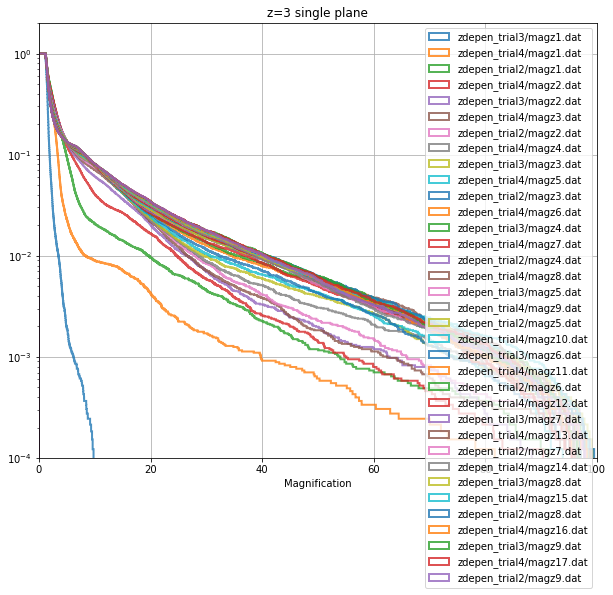

In [68]:
### Magnitude Code

import glob
import sys
import os
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

os.chdir("/Users/agnivaghosh/Downloads/Lensing/magnifications/data/A370/buffalo")

# matplotlib.rcParams.update({'font.size': 22})
muavg = [0 for n in range(102965)]
muavgsq= [0 for n in range(102965)]
sigma = [0 for n in range(35)]
# print(mu)
run_num=1
n_bins = np.linspace(0, 100, num=10000)
j=0
fig, ax = plt.subplots(figsize=(10, 8))
# glob.glob('../../A370/buffalo/zdepen_trial2/magz*.dat')


file=['zdepen_trial3/magz1.dat','zdepen_trial4/magz1.dat','zdepen_trial2/magz1.dat','zdepen_trial4/magz2.dat',
      'zdepen_trial3/magz2.dat','zdepen_trial4/magz3.dat','zdepen_trial2/magz2.dat','zdepen_trial4/magz4.dat',
      'zdepen_trial3/magz3.dat','zdepen_trial4/magz5.dat','zdepen_trial2/magz3.dat','zdepen_trial4/magz6.dat',
      'zdepen_trial3/magz4.dat','zdepen_trial4/magz7.dat','zdepen_trial2/magz4.dat','zdepen_trial4/magz8.dat',
      'zdepen_trial3/magz5.dat','zdepen_trial4/magz9.dat','zdepen_trial2/magz5.dat','zdepen_trial4/magz10.dat',
      'zdepen_trial3/magz6.dat','zdepen_trial4/magz11.dat','zdepen_trial2/magz6.dat','zdepen_trial4/magz12.dat',
      'zdepen_trial3/magz7.dat','zdepen_trial4/magz13.dat','zdepen_trial2/magz7.dat','zdepen_trial4/magz14.dat',
      'zdepen_trial3/magz8.dat','zdepen_trial4/magz15.dat','zdepen_trial2/magz8.dat','zdepen_trial4/magz16.dat',
      'zdepen_trial3/magz9.dat','zdepen_trial4/magz17.dat','zdepen_trial2/magz9.dat']
for filename in file:
    j=j+1
    print(filename)
    mag= np.genfromtxt(filename, dtype=(
        {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 
         'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))
    mag['mag'][0]=1
    mag[mag['xs'] > 55] = np.nan
    mag[mag['xs'] < -35] = np.nan
    mag[mag['ys'] > 45] = np.nan
    mag[mag['ys'] < -45] = np.nan
    nparray=abs(mag['mag'])
    nparray[nparray == 0] = np.nan
#     m=2.5*np.log10(nparray)
    m=nparray
#     m[0]=0
    k=0
    for i in range(len(nparray)):
        if nparray[i]>30:
            k+=1
    counts, bins, what = ax.hist(m, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,alpha=0.8,label=filename)
    print(bins[3000])
    sigma[j-1]=counts[3000]

# print(min(muavgsum))
plt.grid(True)
plt.axis([0, 100, 0.0001, 2])
plt.yscale('log')
ax.set_title('z=3 single plane')
ax.set_xlabel('Magnification')

# plt.xscale('log')
# ax2.set_title('IrtyshII')
# ax2.set_xlabel('Fractional Mass Dispersion')
ax.legend(loc='upper right')
plt.show()
# fig.savefig('z6.5_ind_runs.png', dpi=300)

[0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75
 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.   7.25
 7.5  7.75 8.   8.25 8.5  8.75 9.  ]


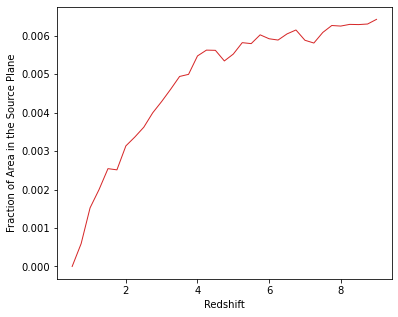

In [66]:
x = np.linspace(0.5,9,num=35)
print(x)
# fig, ax = plt.subplots(figsize=(6,4))
fig, ax = plt.subplots(figsize=(6,5))


# plt.plot(z, d_ls/d_ol/d_os*2.25*10**25,'--',c='black',alpha=0.5,label='$D_{ls}/D_{l}D_{s}$')

# plt.scatter(x,sigma,c='tab:red',s=5)
plt.plot(x,sigma,c='tab:red',linewidth=1,alpha=1)

# # plt.plot(z, scrit/5,'b--')

# plt.plot(z,10**(2.18)*area[:,0],'--',label='small core',alpha=0.5)
# plt.plot(z,10**(1.88)*area[:,1],'--',label='large core',alpha=0.5)

# plt.axis([0,10,0,0.0075])

ax.set_xlabel('Redshift')
ax.set_ylabel('Fraction of Area in the Source Plane')
# plt.xscale('log')
# plt.legend()
plt.show()

# fig.savefig('/Users/agnivaghosh/Downloads/Lensing/mag/plots/zdepen_A370_BUFFALO.pdf', dpi=300, transparent=True, bbox_inches='tight')

In [61]:
len(m)

102965

In [44]:
x

[9, 8.5, 8, 7.5, 7, 6.5, 6, 5.5, 5, 4.5, 4, 3.5, 3, 2.5, 2, 1.5, 1, 0.5]

In [14]:
import glob
import sys
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

################
class constants:
#---------------
	'''
	class of cosmology constants
	'''
    ##########################################
	def __init__(self, omega_m, omega_l, H_0):
    #-----------------------------------------
		self.omega_m = omega_m 					#matter density
		self.omega_l = omega_l					#dark energy density / lambda
		self.omega_k = 1.0 - omega_l - omega_m 	#curvature density, for flat normally zero
		self.H = H_0						#Hubble parameter today
		self.h = H_0/100.					#dimensionless Hubble parameter
		self.d_h = 299792.458/H_0			#Hubble distance, c/H_0 with c in units of km * s^-1


################
class distances:
#---------------
	'''
	class of different distances in cosmology
	'''
    ################################
	def codist(self, z1, z2, cosmo):
    #-------------------------------
		'''
		This function calculates the comoving distance d_c in units of Mpc.
		z1, z2 :: redshifts with z1<z2
		cosmo  :: class of cosmology constants (omega_m, omega_l, h, etc.)
		d_c    :: comoving distance
		'''
		dz = 0.0001
		z = z1 + 0.5 * dz
		d_c = 0.0
		while(z < z2):
			f = 1.0 + z
			demon = cosmo.omega_m * f**3 + cosmo.omega_k * f**2 + cosmo.omega_l
			d_c += dz / np.sqrt(demon)
			z += dz
		return d_c*cosmo.d_h
    ######################################
	def tcodist(self, z1, z2, d_c, cosmo):
    #-------------------------------------
		'''
		This function calculates the transverse comoving distance d_M in units of Mpc.
		z1, z2	:: redshifts with z1<z2
		cosmo	:: class of cosmology constants (omega_m, omega_l, h, etc.)
		d_c		:: comoving distance
		d_M		:: transverse comoving distance
		'''
		d_M = 0.0
		f = np.sqrt(np.abs(cosmo.omega_k))
		if(cosmo.omega_k > 0.0):
			d_M = cosmo.d_h/f*np.sinh(f*d_c/cosmo.d_h)
			#print 'Omega_k > 0'
		elif(cosmo.omega_k < 0.0):
			d_m = cosmo.d_h/f*np.sin(f*d_c/cosmo.d_h)
			#print 'Omega_k < 0'
		else:
			d_M = d_c
		return d_M
    ###############################
	def angdist(self, d_M, z, d_A):
    #------------------------------
		'''
		This function calculates the angular diameter distance d_M in units of Mpc.
		z1		:: redshift z
		d_M		:: transverse comoving distance
		d_A		:: angular diameter distance
		'''
		d_A = 0.0
		d_A = d_M/(1.0+z)
		return d_A






In [15]:
# z = np.polyfit(np.log10(img['z']), std,3)
z = np.linspace(0.38, 9, 100) #[0.5,0.7,0.9,1.1,1.3,1.5,1.7,1.9,2.1] 
# p = np.poly1d(z)

N=len(z)

#Constants
c = 2.9979e10 #speed of light
G = 6.6726e-8 #Gravitational constant in cgs
m_sol = 1.989e33 #Solar mass in grams
rad_arcs = 206264.806 #Conversion factor for going from radians to arcseconds

# Define cosmology.
cosmo = constants(0.3, 0.7, 70)

#Check Curvature is near zero
print ("Omega_k: ", cosmo.omega_k)

# Define redshifts
z_o = 0.0  # observer redshift
z_l = 0.375  # lens redshift for Abell 2744

# Initialize angular diameter arrays
d_ol = np.zeros(N)
d_ls = np.zeros(N)
d_os = np.zeros(N)
scrit = np.zeros(N)

d_c, d_M, d_A = 0.0, 0.0, 0.0  # Initialize distances
dist = distances()  # create cosmology.distance instance



# For loop over images to calculate the angular diameter distances and critical surface densities.
for i in range(N):
    z_s = z[i]

    # Calculate the observer to lens ang dist.
    d_c = dist.codist(z_o, z_l, cosmo)
    dco=d_c
    d_M = dist.tcodist(z_o, z_l, d_c, cosmo)
    d_A = dist.angdist(d_M, z_l, d_A)

    d_ol[i] = d_A * 3.08567758e24  # Convert from Mpc to cm

    # Calculate the lens to source ang dist.
    d_c = dist.codist(z_l, z_s, cosmo)
    d_M = dist.tcodist(z_l, z_s, d_c, cosmo)
    d_A = dist.angdist(d_M, z_s, d_A)

    d_ls[i] = d_A * 3.08567758e24  # Convert from Mpc to cm

    # Calculate the observer to source ang dist.
    d_c = dist.codist(z_o, z_s, cosmo)
    d_M = dist.tcodist(z_o, z_s, d_c, cosmo)
    d_A = dist.angdist(d_M, z_s, d_A)

    d_os[i] = d_A * 3.08567758e24  # Convert from Mpc to cm

    #Calculate critical surface density
    scrit[i] = c**2/(4*np.pi*G)*d_os[i]/d_ol[i]/d_ls[i]
    
# print(scrit,z,d_ol)
print(dco)

Omega_k:  5.551115123125783e-17
1464.1637638509483


In [21]:
z

array([0.38      , 0.46707071, 0.55414141, 0.64121212, 0.72828283,
       0.81535354, 0.90242424, 0.98949495, 1.07656566, 1.16363636,
       1.25070707, 1.33777778, 1.42484848, 1.51191919, 1.5989899 ,
       1.68606061, 1.77313131, 1.86020202, 1.94727273, 2.03434343,
       2.12141414, 2.20848485, 2.29555556, 2.38262626, 2.46969697,
       2.55676768, 2.64383838, 2.73090909, 2.8179798 , 2.90505051,
       2.99212121, 3.07919192, 3.16626263, 3.25333333, 3.34040404,
       3.42747475, 3.51454545, 3.60161616, 3.68868687, 3.77575758,
       3.86282828, 3.94989899, 4.0369697 , 4.1240404 , 4.21111111,
       4.29818182, 4.38525253, 4.47232323, 4.55939394, 4.64646465,
       4.73353535, 4.82060606, 4.90767677, 4.99474747, 5.08181818,
       5.16888889, 5.2559596 , 5.3430303 , 5.43010101, 5.51717172,
       5.60424242, 5.69131313, 5.77838384, 5.86545455, 5.95252525,
       6.03959596, 6.12666667, 6.21373737, 6.30080808, 6.38787879,
       6.47494949, 6.5620202 , 6.64909091, 6.73616162, 6.82323

In [16]:
def kappa(b,s,alpha,r):
    return b*alpha*((s*s+r*r)**(alpha/2-2))*((s*s+r*r)+r*r*(alpha/2-1))

def gamma(b,s,alpha,r):
    return b*alpha*((s*s+r*r)**(alpha/2-2))*((alpha/2-1)*r*r)

def muinv(b,s,alpha,r):
    return (1-kappa(b,s,alpha,r)+gamma(b,s,alpha,r))*(1-kappa(b,s,alpha,r)-gamma(b,s,alpha,r))

def muinv(b,s,alpha,r,scale):
    return abs(1-scale*kappa(b,s,alpha,r)+scale*gamma(b,s,alpha,r))*abs(1-scale*kappa(b,s,alpha,r)-scale*gamma(b,s,alpha,r))

In [17]:
alpha=1
s = np.array([1,5,10,15,20,25,27.5])
b = 10
pi = 3.14
scale=1/scrit
rmax=30
r=np.linspace(0.0, rmax**2, 10000)
mu = np.zeros([len(r),len(s),len(scale)])
a = np.zeros(len(r))
for k in range(len(scale)):
    for i in range(len(r)):
        for j in range(len(s)):
            mu[i,j,k]=1/muinv(b,s[j],alpha,r[i]**0.5,scale[k])
        if i==0: a[i]=pi*r[i]
        if i>0: a[i]=pi*r[i]-pi*r[i-1]
    

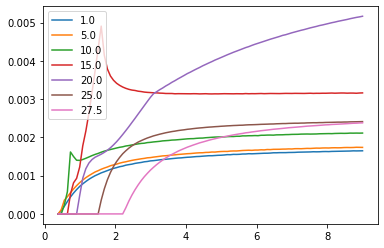

In [18]:
area=np.zeros([len(scale),len(s)])
for k in range(len(scale)):
    for j in range(len(s)):
            m=0
            for i in range(len(r)):
                if mu[i,j,k]>30:
                    m+=a[i]/mu[i,j,k]/(pi*rmax*rmax)
            area[k,j]=m
        
        
        
fig, ax = plt.subplots()
for i in range(len(s)):
    plt.plot(z,area[:,i],label=s[i])
#     plt.plot(z,(3*10**25)*d_ls/d_ol/d_os,'--',color='black')
plt.legend()
# plt.yscale('log')


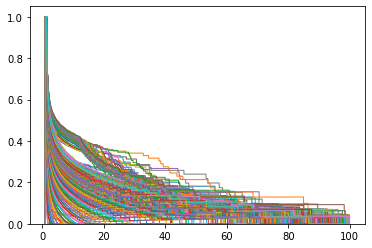

In [13]:
bins=np.zeros([len(scale),10000])
counts=np.zeros([len(scale),9999])
n_bins = np.linspace(1, 100, num=10000)
for k in range(len(scale)):
    for i in range(len(s)):
        counts[k], bins[k], what = plt.hist(abs(mu[:,i,k]),n_bins,cumulative=-1,density=True,
                                            histtype='step',weights=abs(mu[:,i,k]))
        area[k,i]=counts[k][3000]

        




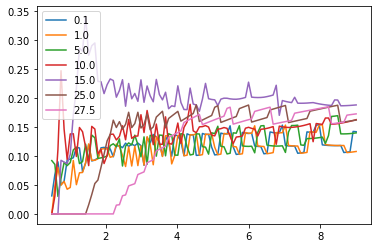

In [14]:
fig, ax = plt.subplots()
for i in range(len(s)):
    plt.plot(z,area[:,i],label=s[i])
#     plt.plot(z,(3*10**25)*d_ls/d_ol/d_os,'--',color='black')
plt.legend()
# plt.yscale('log')

[0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75
 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.   7.25
 7.5  7.75 8.   8.25 8.5  8.75 9.  ]


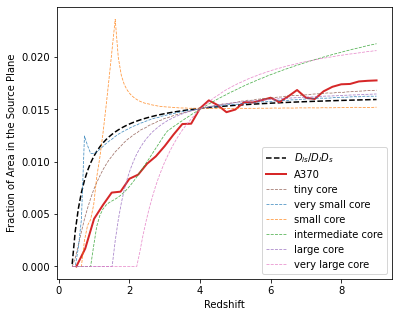

In [69]:
x = np.linspace(0.5,9,num=35)
print(x)
# fig, ax = plt.subplots(figsize=(6,4))
fig, ax = plt.subplots(figsize=(6,5))


plt.plot(z, d_ls/d_ol/d_os*sigma[14]/(d_ls[42]/d_ol[42]/d_os[42]),'--',c='black',label='$D_{ls}/D_{l}D_{s}$')

# plt.scatter(x,sigma,c='tab:red',s=5)
plt.plot(x,sigma,c='tab:red',linewidth=2,alpha=1,label='A370')

# plt.plot(z, scrit/5,'b--')
i=0
j=1
k=2
l=3
m=4
n=5
o=6
plt.plot(z,sigma[14]/area[42,i]*area[:,i],'--',label='tiny core',alpha=0.8,linewidth=0.8,color='tab:brown')
# plt.plot(z,sigma[5]/area[41,j]*area[:,j],'--',label=s[j],alpha=0.4)
# plt.plot(z,sigma[5]/area[30,k]*area[:,k],'--',label=s[k],alpha=0.4)
plt.plot(z,sigma[14]/area[42,k]*area[:,k],'--',label='very small core',alpha=0.8,linewidth=0.8,color='tab:blue')
plt.plot(z,sigma[14]/area[42,l]*area[:,l],'--',label='small core',alpha=0.8,linewidth=0.8,color='tab:orange')
plt.plot(z,sigma[14]/area[42,m]*area[:,m],'--',label='intermediate core',alpha=0.8,linewidth=0.8,color='tab:green')
plt.plot(z,sigma[14]/area[42,n]*area[:,n],'--',label='large core',alpha=0.8,linewidth=0.8,color='tab:purple')
plt.plot(z,sigma[14]/area[42,o]*area[:,o],'--',label='very large core',alpha=0.8,linewidth=0.8,color='tab:pink')





# plt.axis([0,10,0,0.0075])

ax.set_xlabel('Redshift')
ax.set_ylabel('Fraction of Area in the Source Plane')
# plt.xscale('log')
plt.legend()
fig.savefig('/Users/agnivaghosh/Downloads/Lensing/magnifications/plots/zdepen_A370_BUFFALO.pdf', dpi=300, transparent=True, bbox_inches='tight')


In [1013]:
area[10,:]

array([0.00454891, 0.00450491, 0.00388064, 0.0035997 , 0.00431006,
       0.00421702, 0.00441537])

In [795]:
sigma[3]

0.005914688629035364

In [21]:
z

array([0.38      , 0.46707071, 0.55414141, 0.64121212, 0.72828283,
       0.81535354, 0.90242424, 0.98949495, 1.07656566, 1.16363636,
       1.25070707, 1.33777778, 1.42484848, 1.51191919, 1.5989899 ,
       1.68606061, 1.77313131, 1.86020202, 1.94727273, 2.03434343,
       2.12141414, 2.20848485, 2.29555556, 2.38262626, 2.46969697,
       2.55676768, 2.64383838, 2.73090909, 2.8179798 , 2.90505051,
       2.99212121, 3.07919192, 3.16626263, 3.25333333, 3.34040404,
       3.42747475, 3.51454545, 3.60161616, 3.68868687, 3.77575758,
       3.86282828, 3.94989899, 4.0369697 , 4.1240404 , 4.21111111,
       4.29818182, 4.38525253, 4.47232323, 4.55939394, 4.64646465,
       4.73353535, 4.82060606, 4.90767677, 4.99474747, 5.08181818,
       5.16888889, 5.2559596 , 5.3430303 , 5.43010101, 5.51717172,
       5.60424242, 5.69131313, 5.77838384, 5.86545455, 5.95252525,
       6.03959596, 6.12666667, 6.21373737, 6.30080808, 6.38787879,
       6.47494949, 6.5620202 , 6.64909091, 6.73616162, 6.82323

In [143]:
alpha=1
s = np.array([5/32,5/16,5/8,5/4,5/2,5,27.5])
b = 10

scale=1/scrit
x=np.linspace(-30, 30, 1000)
y=np.linspace(-30, 30, 1000)
X, Y = np.meshgrid(x, y)
R=X*X+Y*Y
mu = np.zeros([len(s),len(scale),len(x),len(y)])
for k in range(len(scale)):
    for j in range(len(s)):
        for l in range(len(x)):
            mu[j,k,l,:]=1/muinv(b,s[j],alpha,(x[l]*x[l]+y[:]*y[:])**0.5,scale[k]) #source of error because of the for loops
        

In [144]:
%matplotlib agg

fig = plt.figure(figsize=(36,36))

plt.ioff()
matplotlib.figure.SubplotParams(wspace=0.1, hspace=0.1)
i=0
# plt.ioff()
for j in range(len(s)):
    for k in range(len(scale)):
    
        i=i+1
        Z=(mu[j,k,:,:]).reshape(1000,1000)
#         ax.set_axis_off()
        ax = fig.add_subplot(len(s), len(scale), i)
        im=ax.pcolormesh(X,Y,np.log10(abs(Z)),vmax=3,vmin=-3,cmap='plasma',shading='auto') 
        ax.set_title('s= '+str(s[j])+', z = '+str(z[k]))
        ax.set_aspect('equal')
        
fig.subplots_adjust(right=0.93)
cbar_ax = fig.add_axes([0.95, 0.25, 0.01, 0.5])
fig.colorbar(im, cax=cbar_ax,shrink=0.5)
        
fig.savefig('/Users/agnivaghosh/Downloads/Lensing/mag/plots/Mag_z_maps_trials.png', 
            dpi=300, bbox_inches='tight')

In [149]:
bins=np.zeros([len(scale),10000])
counts=np.zeros([len(scale),9999])
area=np.zeros([len(scale),len(s)])
n_bins = np.linspace(1, 100, num=10000)
for k in range(len(scale)):
    for j in range(len(s)):
        counts[k], bins[k], what = plt.hist(abs(mu1[j,k,:]),n_bins,cumulative=-1,density=True,histtype='step',weights=abs(mu1[j,k,:]))
        area[k,j]=counts[k][3000]
plt.yscale('log')
print(bins[1][3000])

30.702970297029704


In [ ]:
np.shape(mu1)

In [148]:
mu1=mu.reshape(7,9,1000000)

[9, 8, 7, 6, 5, 4, 3, 2, 1]


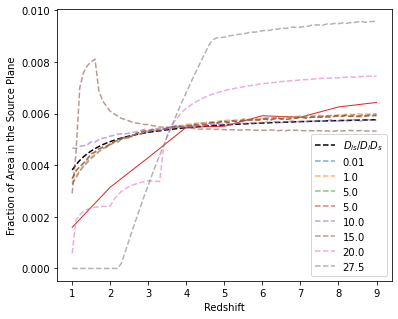

In [27]:
x = [9,8,7,6,5,4,3,2,1]
print(x)
# fig, ax = plt.subplots(figsize=(6,4))
fig, ax = plt.subplots(figsize=(6,5))


plt.plot(z, d_ls/d_ol/d_os*2.25*10**25,'--',c='black',label='$D_{ls}/D_{l}D_{s}$')

# plt.scatter(x,sigma,c='tab:red',s=5)
plt.plot(x,sigma,c='tab:red',linewidth=1,alpha=1)

# plt.plot(z, scrit/5,'b--')
i=0
j=1
k=2
l=3
m=4
n=5
o=6
plt.plot(z,sigma[5]/area[26,i]*area[:,i],'--',label=s[i],alpha=0.6)
plt.plot(z,sigma[5]/area[26,j]*area[:,j],'--',label=s[j],alpha=0.6)
plt.plot(z,sigma[5]/area[26,k]*area[:,k],'--',label=s[k],alpha=0.6)
plt.plot(z,sigma[5]/area[26,k]*area[:,k],'--',label=s[k],alpha=0.6)
plt.plot(z,sigma[5]/area[26,l]*area[:,l],'--',label=s[l],alpha=0.6)
plt.plot(z,sigma[5]/area[26,m]*area[:,m],'--',label=s[m],alpha=0.6)
plt.plot(z,sigma[5]/area[26,n]*area[:,n],'--',label=s[n],alpha=0.6)
plt.plot(z,sigma[5]/area[26,o]*area[:,o],'--',label=s[o],alpha=0.6)





# plt.axis([0,10,0,0.0075])

ax.set_xlabel('Redshift')
ax.set_ylabel('Fraction of Area in the Source Plane')
# plt.xscale('log')
plt.legend()
fig.savefig('/Users/agnivaghosh/Downloads/Lensing/mag/plots/zdepen_A370_BUFFALO_trials.pdf', dpi=300, transparent=True, bbox_inches='tight')

